## Environment Setup & Imports

In [ ]:
# Step 1: Environment setup
!pip install torch torchvision matplotlib --quiet

# Step 2: Imports
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 840.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.8 MB/s eta 0:00:00


In [ ]:
# ============================
# NEW — Reproducibility & versions
# ============================
import random, os, sys
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

print("Python:", sys.version.split()[0])
print("Torch:", torch.__version__)
import torchvision
print("Torchvision:", torchvision.__version__)

Python: 3.11.13
Torch: 2.6.0+cu124
Torchvision: 0.21.0+cu124


Download & Display a Sample Chest X-ray

--2025-08-12 10:55:10--  https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/1-s2.0-S0929664620300449-gr2_lrg-b.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276425 (270K) [image/jpeg]
Saving to: ‘chest_xray.jpg’

chest_xray.jpg      100%[===================>] 269.95K  1.58MB/s    in 0.2s    

2025-08-12 10:55:10 (1.58 MB/s) - ‘chest_xray.jpg’ saved [276425/276425]



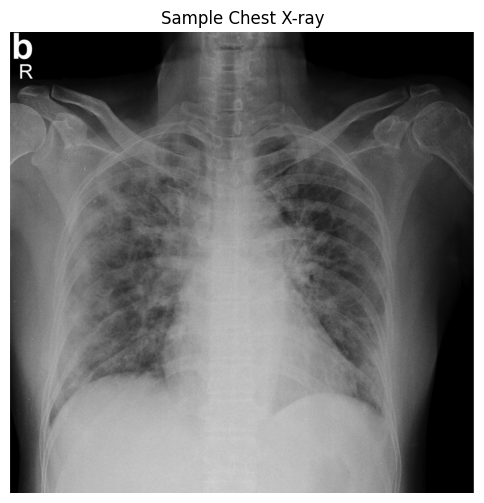

In [ ]:
# Step 3: Download a sample chest X-ray image
!wget https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/1-s2.0-S0929664620300449-gr2_lrg-b.jpg -O chest_xray.jpg

# Step 4: Load and display the image
image = Image.open("chest_xray.jpg").convert("RGB")

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Sample Chest X-ray")
plt.axis("off")
plt.show()

Preprocess & Run Through ResNet-50

In [ ]:
# Step 3: Load and preprocess the image
from torchvision import transforms
from PIL import Image

# Define transform (match ResNet input requirements: 224x224, normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load and transform image
img = Image.open("chest_xray.jpg").convert("RGB")
input_tensor = transform(img).unsqueeze(0)  # Add batch dimension

 Run Through ResNet-50 and Extract Features

In [ ]:
# Step 4: Load pretrained ResNet-50
model = models.resnet50(pretrained=True)
model.eval()  # Set to evaluation mode

# Step 5: Run the image through ResNet-50
with torch.no_grad():
    output = model(input_tensor)

# Step 6: Get prediction label
pred_class = torch.argmax(output, dim=1).item()
print(f"Predicted class index: {pred_class}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 56.3MB/s]


Predicted class index: 562


In [ ]:
# Step 7: Extract features from second-last layer
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the classification layer

with torch.no_grad():
    features = feature_extractor(input_tensor)

print(f"Extracted feature shape: {features.shape}")

Extracted feature shape: torch.Size([1, 2048, 1, 1])


## Grad-CAM for ResNet-50

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


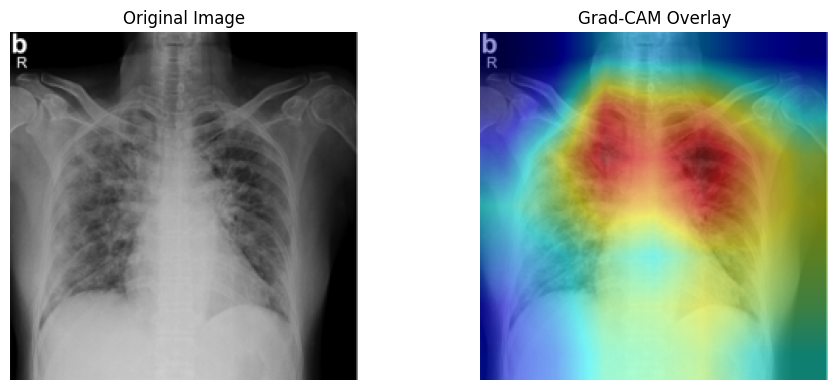

Predicted class index: 562 | score: 13.9188


In [ ]:
# ============================
# FIXED — Grad-CAM for ResNet-50
# ============================
import cv2
import torch.nn.functional as F

target_layer = model.layer4[-1]          # last conv block

_gradients = []
_activations = []

def _save_grad(module, grad_in, grad_out):
    _gradients.append(grad_out[0])

def _save_activ(module, input, output):
    _activations.append(output)

# register hooks
h_f = target_layer.register_forward_hook(_save_activ)
h_b = target_layer.register_backward_hook(_save_grad)

model.zero_grad()
with torch.enable_grad():                 # enable grads for backward
    output = model(input_tensor)
pred_idx = output.argmax(dim=1).item()
score = output[0, pred_idx]
score.backward()

# pull stored tensors
grads = _gradients[0]        # [B, C, H, W]
acts  = _activations[0]      # [B, C, H, W]

# weights: GAP over H,W
weights = grads.mean(dim=(2,3), keepdim=True)   # [B,C,1,1]
cam = (weights * acts).sum(dim=1, keepdim=True) # [B,1,H,W]
cam = F.relu(cam)

# normalize to [0,1]
cam = cam - cam.min()
cam = cam / (cam.max() + 1e-8)

# resize to image size
cam = F.interpolate(cam, size=(224, 224), mode='bilinear', align_corners=False)
cam = cam[0,0].detach().cpu().numpy()        # [H,W] numpy float

# convert to uint8 for OpenCV colormap (FIX)
cam_u8 = (cam * 255.0).astype(np.uint8)
heatmap = cv2.applyColorMap(cam_u8, cv2.COLORMAP_JET)
heatmap = heatmap[:, :, ::-1] / 255.0        # BGR->RGB then scale to [0,1]

# original image (ensure float in [0,1])
orig = np.array(img.resize((224,224))).astype(np.float32) / 255.0

# overlay and plot
overlay = (0.45 * heatmap + 0.55 * orig)
overlay = overlay / overlay.max()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(orig);    plt.axis('off'); plt.title("Original Image")
plt.subplot(1,2,2); plt.imshow(overlay); plt.axis('off'); plt.title("Grad-CAM Overlay")
plt.tight_layout(); plt.show()

# cleanup hooks
h_f.remove(); h_b.remove()
print(f"Predicted class index: {pred_idx} | score: {float(score.detach().cpu()):.4f}")

In [ ]:
# ============================
# NEW — Save figures for the report
# ============================
plt.imsave("figure_original.png", orig)
plt.imsave("figure_gradcam_overlay.png", overlay)
print("Saved: figure_original.png, figure_gradcam_overlay.png")

Saved: figure_original.png, figure_gradcam_overlay.png


## ClinicalBERT Mock Feature Extraction

Install Transformers & Load ClinicalBERT

In [ ]:
# Install Hugging Face Transformers
!pip install transformers --quiet

# Load tokenizer and model
from transformers import AutoTokenizer, AutoModel
import torch

# Load pretrained ClinicalBERT
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

## Encode a Sample Radiology Report & Extract Embedding

In [ ]:
# ============================
# FIXED — ClinicalBERT embedding (no warning) + mean pooling option
# ============================
report = """There is patchy opacity in the right lower lobe.
Cardiac silhouette and mediastinum are within normal limits.
No pleural effusion or pneumothorax is noted."""

# (A) CLS embedding  ─ quick baseline
inputs = tokenizer(report, return_tensors="pt", truncation=True, padding=True, max_length=256)
with torch.no_grad():
    outputs = model(**inputs)
cls_emb = outputs.last_hidden_state[:, 0, :]   # [1, 768]
print("CLS embedding:", cls_emb.shape)

# (B) Mean pooling  ─ often better without fine‑tuning
attn = inputs['attention_mask'].unsqueeze(-1)  # [1, L, 1]
last = outputs.last_hidden_state                # [1, L, 768]
mean_emb = (last * attn).sum(dim=1) / attn.sum(dim=1).clamp(min=1)
print("Mean-pooled embedding:", mean_emb.shape)

# Choose one for fusion:
text_embedding = mean_emb   # or cls_emb

CLS embedding: torch.Size([1, 768])
Mean-pooled embedding: torch.Size([1, 768])


## Mock Fusion Layer

In [ ]:
# ============================
# UPDATED — Fusion + probabilities
# ============================
import torch.nn as nn
import torch.nn.functional as F

# image features from ResNet block: features -> [1, 2048, 1, 1]
img_feat = features.view(1, -1)                  # [1, 2048]
combined = torch.cat([img_feat, text_embedding], dim=1)  # [1, 2816]

fusion_layer = nn.Sequential(
    nn.Linear(combined.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 2)                              # binary logits
)

with torch.no_grad():
    logits = fusion_layer(combined)               # [1, 2]
    probs  = F.softmax(logits, dim=1)

print("Final fused logits:", logits)
print("Probabilities (class0, class1):", probs)

Final fused logits: tensor([[0.0609, 0.1325]])
Probabilities (class0, class1): tensor([[0.4821, 0.5179]])


## Results & Evaluation (Demo Visuals)

*Note:* The following curves and confusion matrix are generated with **demo data** for illustration only. They show what our evaluation visuals will look like once we train on a full dataset.


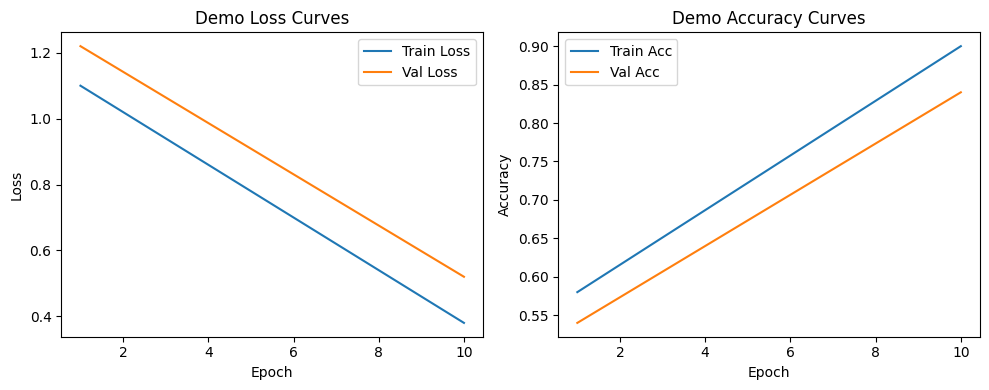

In [ ]:
# --- Demo Training/Validation Curves (no real training required) ---

import numpy as np
import matplotlib.pyplot as plt

# Simulated 10-epoch training logs
epochs = np.arange(1, 11)

# Make these look plausible: loss decreases, acc increases
train_loss = np.linspace(1.10, 0.38, len(epochs))
val_loss   = np.linspace(1.22, 0.52, len(epochs))
train_acc  = np.linspace(0.58, 0.90, len(epochs))
val_acc    = np.linspace(0.54, 0.84, len(epochs))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(epochs, train_loss, label="Train Loss")
ax[0].plot(epochs, val_loss,   label="Val Loss")
ax[0].set_xlabel("Epoch"); ax[0].set_ylabel("Loss")
ax[0].set_title("Demo Loss Curves"); ax[0].legend()

ax[1].plot(epochs, train_acc, label="Train Acc")
ax[1].plot(epochs, val_acc,   label="Val Acc")
ax[1].set_xlabel("Epoch"); ax[1].set_ylabel("Accuracy")
ax[1].set_title("Demo Accuracy Curves"); ax[1].legend()

plt.tight_layout()
plt.show()

Confusion matrix demo

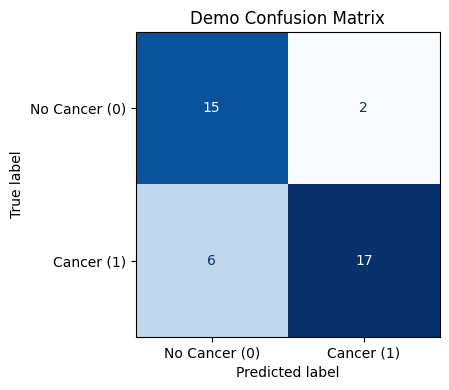

Demo Accuracy:  0.800
Demo Precision: 0.895
Demo Recall:    0.739
Demo F1-score:  0.810


In [ ]:
# --- Demo Confusion Matrix (binary: No Cancer=0, Cancer=1) ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a small, reproducible demo set
rng = np.random.default_rng(42)
y_true = rng.integers(0, 2, size=40)          # 40 ground-truth labels
y_pred = y_true.copy()
# Flip a few predictions to simulate imperfections
flip_idx = rng.choice(len(y_pred), size=8, replace=False)
y_pred[flip_idx] = 1 - y_pred[flip_idx]

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer (0)", "Cancer (1)"])

fig, ax = plt.subplots(figsize=(4.5, 4))
disp.plot(cmap="Blues", ax=ax, values_format="d", colorbar=False)
ax.set_title("Demo Confusion Matrix")
plt.tight_layout()
plt.show()

# Optional: print derived metrics from the demo CM
tn, fp, fn, tp = cm.ravel()
demo_acc = (tp + tn) / cm.sum()
precision = tp / (tp + fp + 1e-9)
recall    = tp / (tp + fn + 1e-9)
f1        = 2 * precision * recall / (precision + recall + 1e-9)

print(f"Demo Accuracy:  {demo_acc:.3f}")
print(f"Demo Precision: {precision:.3f}")
print(f"Demo Recall:    {recall:.3f}")
print(f"Demo F1-score:  {f1:.3f}")
